In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import tensorflow as tf

In [5]:
img_height = 150
img_width = 150
batch_size = 1

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((150,150,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(3, activation= 'softmax')
])

In [7]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    'ColorDataSet',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size= batch_size,
    image_size=(img_height, img_width),
    shuffle= True,
    seed = 4,
    validation_split= 0.2,
    subset = "training"
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    'ColorDataSet',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size= batch_size,
    image_size=(img_height, img_width),
    shuffle= True,
    seed = 4,
    validation_split= 0.2,
    subset = "validation"
)

ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    'ColorDataSet',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size= batch_size,
    image_size=(img_height, img_width),
    shuffle= True,
    seed = 4
)

Found 75 files belonging to 3 classes.
Using 60 files for training.
Found 75 files belonging to 3 classes.
Using 15 files for validation.
Found 75 files belonging to 3 classes.


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [9]:
ds_train = ds_train.map(lambda x, y: (normalization_layer(x), y))
ds_validation= ds_validation.map(lambda x, y: (normalization_layer(x), y))
ds_test= ds_test.map(lambda x, y: (normalization_layer(x), y))

In [10]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=[tf.keras.losses.SparseCategoricalCrossentropy()],
    metrics=["accuracy"]
)

In [11]:
history = model.fit(ds_train, epochs=10, validation_data= ds_validation)

Epoch 1/10
60/60 [==============================] - 2s 20ms/step - loss: 0.4117 - accuracy: 0.8333 - val_loss: 0.5731 - val_accuracy: 1.0000
Epoch 2/10
60/60 [==============================] - 1s 19ms/step - loss: 0.2983 - accuracy: 1.0000 - val_loss: 0.5529 - val_accuracy: 1.0000
Epoch 3/10
60/60 [==============================] - 1s 22ms/step - loss: 0.2877 - accuracy: 1.0000 - val_loss: 0.5332 - val_accuracy: 1.0000
Epoch 4/10
60/60 [==============================] - 1s 21ms/step - loss: 0.2772 - accuracy: 1.0000 - val_loss: 0.5132 - val_accuracy: 1.0000
Epoch 5/10
60/60 [==============================] - 1s 21ms/step - loss: 0.2672 - accuracy: 1.0000 - val_loss: 0.4938 - val_accuracy: 1.0000
Epoch 6/10
60/60 [==============================] - 1s 18ms/step - loss: 0.2570 - accuracy: 1.0000 - val_loss: 0.4758 - val_accuracy: 1.0000
Epoch 7/10
60/60 [==============================] - 1s 19ms/step - loss: 0.2474 - accuracy: 1.0000 - val_loss: 0.4579 - val_accuracy: 1.0000
Epoch 8/10
60

In [12]:
class_names = ["Blue", "Green", "Red"]

In [13]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [20]:
for test_images, test_labels in ds_test.take(7):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)


1/1 [==============================] - 0s 20ms/step


In [21]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[1.1177468e-26 1.0000000e+00 0.0000000e+00]
1
1


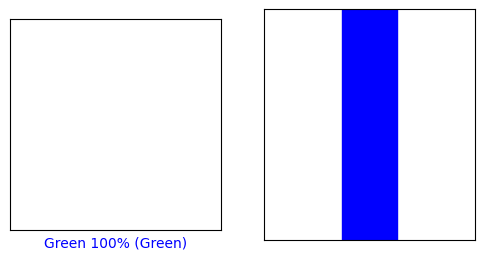

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)